### IndyCar Paper Figures


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import random
import pickle
import json
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

dataroot = 'data/'

## Fig 2b

In [3]:
def drawacar(test_event, carno=12, scale=1):
    alldata, rankdata, acldata, flagdata = stagedata[test_event]
    
    #maxlap = get_event_info(test_event)[0]
    print('carno:', set(list(rankdata['car_number'].values)))
    print('laps:', set(list(rankdata['completed_laps'].values)))
    
    
    maxlap = max(list(rankdata['completed_laps'].values))
    
    a = rankdata[rankdata['completed_laps']>=maxlap-1]
    print(set(list(a['car_number'].values)))
    
    df12 = rankdata[rankdata['car_number']==carno]

    data = df12[['completed_laps','rank','last_laptime','time_behind_leader']].values
    pitstop = df12[['lap_status']].values
    caution = df12[['track_status']].values
    pitstop = np.array([1 if x=='P' else 0 for x in pitstop])
    caution = np.array([1 if x=='Y' else 0 for x in caution])
    pitidx = np.where(pitstop == 1)
    pits = data[pitidx]
    yidx = np.where(caution == 1)
    cautions = data[yidx]
    

    data = data[1:,:]
    
    #red = '#ff8080'
    red = 'red'
    #yellow = '#8080ff'
    #yellow = 'yellow'
    yellow = '#f5d12b'
    #green = '#80ff80'
    green = 'green'
    
    print('pitidx:', pitidx)
    print('maxlap:', maxlap)
    def add_status(axs,y=-1, height=1):
        for lap in range(maxlap):
            fc = green
            if caution[lap] == 1:
                fc = yellow
            if pitstop[lap] == 1:
                fc = red
            ec = fc
            rectangle = plt.Rectangle((lap,y), 1, height, fc=fc,ec=ec)
            #plt.gca().add_patch(rectangle)
            axs.add_patch(rectangle)

    lw=1

    fig, axs = plt.subplots(2, 1, figsize=(10, 4*scale))
    #fig, axs = plt.subplots(2, 1, figsize=(10, 3*scale))
    axs[0].plot(data[:,0],data[:,1],'.-', linewidth=lw)
    #axs[0].plot(cautions[:,0],cautions[:,1],'.',color='y', label='CautionLap', linewidth=2)
    axs[0].plot(pits[:,0],pits[:,1],'^',color='r', label='PitStop', linewidth=lw)
    add_status(axs[0])
    #axs[0].set_ylim((-1,20))
    axs[0].set_ylabel('Rank')
    axs[0].set_ylim((-1,24))

    axs[1].plot(data[:,0],data[:,2],'.-', linewidth=lw)
    #axs[1].plot(cautions[:,0],cautions[:,2],'.',color='y', label='CautionLap', linewidth=2)
    axs[1].plot(pits[:,0],pits[:,2],'^',color='r', label='PitStop', linewidth=lw)
    add_status(axs[1],33,4)
    #axs[1].set_ylim((33,130))    
    axs[1].set_ylim((33,150))    

    axs[1].set_ylabel('LapTime(s)')
    axs[1].set_xlabel('Lap')

    axs[1].plot([0],[0],'s',color=green, label='NormalLap', linewidth=lw)
    axs[1].plot([0],[0],'s',color=yellow, label='CautionLap', linewidth=lw)
    plt.legend(prop={'size': 10})    
    
    plt.tight_layout()
    plt.savefig('figs/Fig2b-%s-car%d-%s.pdf'%(test_event, carno, scale))

In [4]:
def loaddata(datafile):
    with open(datafile, 'rb') as f:
        alldata = pickle.load(f, encoding='latin1') 
        return alldata
    


carno: {1, 3, 4, 6, 7, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 59, 60, 64, 66, 88, 98}
laps: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,

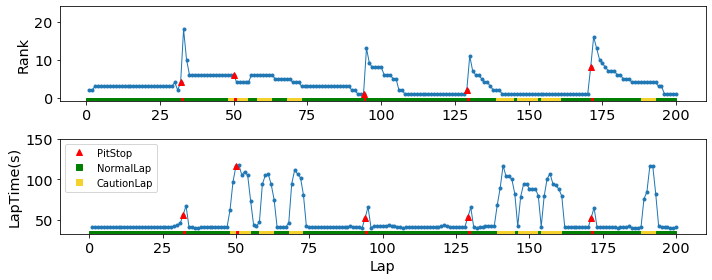

In [5]:
#data, pits, caution, pitstop = loaddata('Fig2-b.pickle')
STAGE_DATASET = f'{dataroot}/stagedata-IndyCar_d16_v9_p0.pickle'

with open(STAGE_DATASET, 'rb') as f:
    stagedata = pickle.load(f, encoding='latin1') 
    
drawacar('Indy500-2018', carno=12)

In [ ]:
drawacar('Indy500-2018', carno=12, scale=0.75)

carno: {2, 3, 4, 5, 7, 9, 10, 12, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 39, 42, 48, 60, 63, 77, 81, 88, 98}
laps: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,

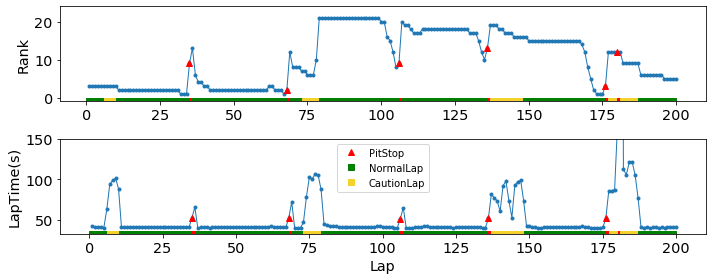

In [71]:
drawacar('Indy500-2019', carno=12)

In [50]:
df12 = rankdata

data = df12[['completed_laps','rank','last_laptime','time_behind_leader']].values
pitstop = df12[['lap_status']].values
caution = df12[['track_status']].values
pitstop = np.array([1 if x=='P' else 0 for x in pitstop])
caution = np.array([1 if x=='Y' else 0 for x in caution])

pitidx = np.where(pitstop == 1)
pits = data[pitidx]
print(sorted(set(list(pits[:,0].astype(int)))))


cautionidx = np.where(caution == 1)
cautions = data[cautionidx]
#print(pits)
print(sorted(set(list(cautions[:,0].astype(int)))))


[29, 30, 31, 32, 33, 34, 35, 36, 46, 50, 52, 53, 54, 60, 62, 70, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 103, 104, 106, 107, 108, 110, 120, 121, 124, 125, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 146, 150, 152, 156, 157, 158, 160, 168, 170, 171, 172, 173, 174, 175, 176, 177, 180, 185, 187, 190, 191, 195, 196, 197]
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 67, 68, 69, 70, 71, 72, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192]


In [ ]:
#drawacar('Texas-2018', carno=12)

In [ ]:
#drawacar('Pocono-2018', carno=1)

In [ ]:
#drawacar('Gateway-2018', carno=1)

In [ ]:
#drawacar('Phoenix-2018', carno=1)

In [ ]:
#drawacar('Texas-2019', carno=2)

In [ ]:
#drawacar('Indy500-2019', carno=12)

## Fig.5

normalpit .vs. cautionpit: 115 77
min: 0 28


/scratch_ssd/hpda/anaconda3/envs/gluonts/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/scratch_ssd/hpda/anaconda3/envs/gluonts/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


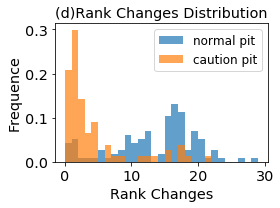

In [6]:
draw_title = True
drawid = 'fig5-notitle' if not draw_title else 'fig5'
os.makedirs(f'figs/{drawid}/', exist_ok=True)


low, high = 1, 1

### check the rank change


alldata, rankdata, acldata, flagdata = stagedata['Indy500-2018']


carlist = set(list(rankdata.car_number.values))

rankchg_df = []
rankchg_cols = ['carno', 'normalpit', 'rankchange']
for carno in carlist:
    df = rankdata[rankdata['car_number']==carno]
    
    pits = df[df['lap_status']=='P']
    
    for pitlap in pits.completed_laps.values:
        pitdf = df[(df['completed_laps']>=pitlap-low) & (df['completed_laps']<=pitlap+high)]
        
        rankchange = np.max(pitdf[['rank']].values) - np.min(pitdf[['rank']].values)
        
        trackstatus = df[df['completed_laps']==pitlap].track_status.values[0]
        normalpit = 0 if trackstatus == 'Y' else 1
                          
        rankchg_df.append([carno, normalpit, rankchange])
                          
rankchg_df = pd.DataFrame(data=rankchg_df, columns=rankchg_cols)   

print('normalpit .vs. cautionpit:', len(rankchg_df[rankchg_df['normalpit']==1]), len(rankchg_df[rankchg_df['normalpit']==0]))
print('min:', np.min(rankchg_df.rankchange.values),np.max(rankchg_df.rankchange.values))

# car 12, will power
bins=np.arange(30)
cautionpits = rankchg_df[rankchg_df['normalpit']==0].rankchange
normalpits = rankchg_df[(rankchg_df['normalpit']==1)].rankchange

fig, axs = plt.subplots(1, 1, figsize=(4, 3))
axs.hist(normalpits,bins= bins,normed=1,  alpha=0.7,label='normal pit')
axs.hist(cautionpits,bins= bins,normed=1,  alpha=0.7,label='caution pit')
axs.set_xlabel('Rank Changes')
axs.set_ylabel('Frequence')
if draw_title:
    axs.set_title('(d)Rank Changes Distribution')
axs.legend(prop={'size': 12})
plt.tight_layout()
#plt.savefig('figs/rankchange_distribution-%d%d.pdf'%(low, high))
plt.savefig(f'figs/{drawid}/rankchange_distribution-{low}{high}.pdf')

In [7]:
def make_pitmodel(lapcnts):
    """
    input:
        lapcnts ; series of lapcnt
    output:
        pitmodel; {lapcnt: cnt}
    """
    pitmodel = {}
    
    data = sorted(lapcnts)
    for x in data:
        if x in pitmodel:
            pitmodel[x] += 1
        else:
            pitmodel[x] = 1
            
    #norm
    for x in pitmodel.keys():
        pitmodel[x] = pitmodel[x] / len(data)
            
    return pitmodel

def plot_cdf(normal_dist, title):
    #normal_dist = df.lap_cnt
    lapcnt_model = make_pitmodel(normal_dist.values)
    p = list(lapcnt_model.values())
    k = list(lapcnt_model.keys())
    lapcnt_cdf = np.cumsum(p) / np.sum(p)
    plt.plot(k,lapcnt_cdf)
    plt.xlabel('Laps')
    plt.ylabel('CDF')
    plt.title(title)
    
    return lapcnt_model

/scratch_ssd/hpda/anaconda3/envs/gluonts/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
/scratch_ssd/hpda/anaconda3/envs/gluonts/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


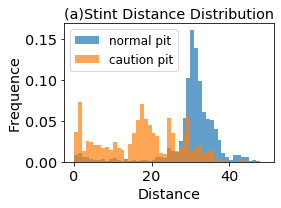

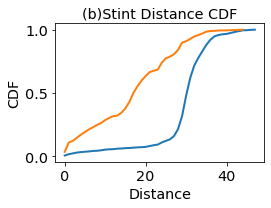

In [14]:
dfall = pd.read_csv(f'{dataroot}/pitstop-indy2013-2019.csv')
fig, axs = plt.subplots(1, 1, figsize=(4, 3))
#fig, axs = plt.subplots(1, 2)


# car 12, will power
bins=np.arange(50)
car12 = dfall
nlap = car12[car12['lap_time']<80].lap_cnt
nlap = car12.lap_cnt
clap = car12[car12['pit_oncaution']==0].lap_cnt
#clap2 = car12[(car12['pit_oncaution']==1) & (car12['lap_time']<80)].lap_cnt
clap2 = car12[(car12['pit_oncaution']==1)].lap_cnt
#plt.hist(nlap,bins= bins, label='all')
axs.hist(clap,bins= bins,normed=1,  alpha=0.7,label='normal pit')
axs.hist(clap2,bins= bins,normed=1,  alpha=0.7,label='caution pit')
axs.set_xlabel('Distance')
axs.set_ylabel('Frequence')
if draw_title:
    axs.set_title('(a)Stint Distance Distribution')
axs.legend(prop={'size': 12})
plt.tight_layout()
plt.savefig(f'figs/{drawid}/pitmodel_a.pdf')


linewidth = 2

fig, axs = plt.subplots(1, 1, figsize=(4, 3))
df = dfall
df = df[(df['pit_oncaution']==0)]
lapcnt_model = make_pitmodel(df.lap_cnt.values)
p = list(lapcnt_model.values())
k = list(lapcnt_model.keys())
lapcnt_cdf = np.cumsum(p) / np.sum(p)
axs.plot(k,lapcnt_cdf, label='normal pit(total = %d)'%(len(df)),linewidth=linewidth)

df = dfall
df = df[(df['pit_oncaution']==1)]
lapcnt_model = make_pitmodel(df.lap_cnt.values)
p = list(lapcnt_model.values())
k = list(lapcnt_model.keys())
lapcnt_cdf = np.cumsum(p) / np.sum(p)
axs.plot(k,lapcnt_cdf, label='caution pit(total = %d)'%(len(df)),linewidth=linewidth)

axs.set_xlabel('Distance')
axs.set_ylabel('CDF')
if draw_title:
    axs.set_title('(b)Stint Distance CDF')
#axs[1].legend(prop={'size': 10})
plt.tight_layout()
plt.savefig(f'figs/{drawid}/pitmodel_b.pdf')

/scratch_ssd/hpda/anaconda3/envs/gluonts/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/scratch_ssd/hpda/anaconda3/envs/gluonts/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


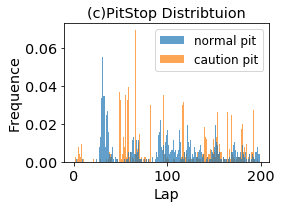

In [90]:
dfall

fig, axs = plt.subplots(1, 1, figsize=(4, 3))
#fig, axs = plt.subplots(1, 2)


# car 12, will power
bins=np.arange(200)
car12 = dfall

clap = car12[car12['pit_oncaution']==0].lap_number
clap2 = car12[(car12['pit_oncaution']==1)].lap_number

axs.hist(clap,bins= bins,normed=1,  alpha=0.7,label='normal pit')
axs.hist(clap2,bins= bins,normed=1,  alpha=0.7,label='caution pit', zorder=-10)

axs.set_xlabel('Lap')
axs.set_ylabel('Frequence')
if draw_title:
    axs.set_title('(c)PitStop Distribtuion')
axs.legend(prop={'size': 12})
plt.tight_layout()
plt.savefig(f'figs/{drawid}/pitmodel_c.pdf')



## Fig. plen

In [6]:
dfl = pd.read_csv(f'{dataroot}/Shortterm-Indy500-2019-Plen2-8.csv')
dfl.head(2)

,sid,Year,Model,SignAcc,MAE,50-Risk,90-Risk,plen,Top1Acc,MAE.1,50-Risk.1,90-Risk.1
0,1,2019,CurRank,0.73,1.16,0.08,0.080,2,0.00,0.00,0.00,0.00
1,2,2019,ARIMA,0.57,1.46,0.11,0.106,2,-0.22,-0.26,-0.37,-0.31


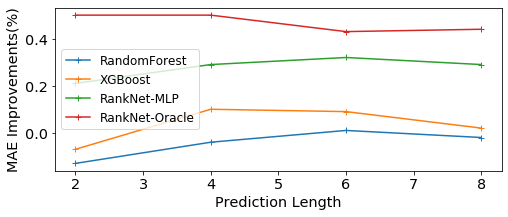

In [40]:
models=['ARIMA','RandomForest','SVM','XGBoost','deepAR','RankNet-Joint','RankNet-MLP','RankNet-Oracle']
models=['XGBoost','deepAR','RankNet-Joint','RankNet-MLP','RankNet-Oracle']
models=['RandomForest','XGBoost','RankNet-MLP','RankNet-Oracle']
#TransformerWFM-MLP
#TransformerWFM-Oracle'
plens=[2,4,6,8]

data = {}
for m in models:
    data[m] = dfl[dfl['Model']==m][['MAE.1']].values.reshape(-1)

fig, axs = plt.subplots(1, 1, figsize=(8, 3))

for m in models:
    axs.plot(plens, data[m], '+-' , label=m)

axs.set_xlabel('Prediction Length')
axs.set_ylabel('MAE Improvements(%)')
#axs.set_title('Stint Distance Histogram')
axs.legend(prop={'size': 12})
#plt.tight_layout()
#plt.savefig(f'{dataroot}/plen.pdf')



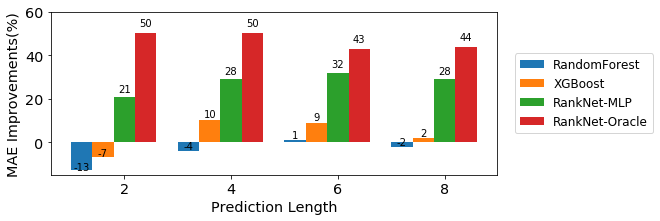

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

N = len(plens)

ind = np.arange(N) 
width = 0.2      
rects = []
for idx, m in enumerate(models):
    rects.append(plt.bar(ind +  width*idx, data[m]*100, width, label=m))

for rect in rects:
    autolabel(rect)
    
plt.xticks(ind + width*N/ 2, [str(x) for x in plens])

ax.set_ylim(-15,60)
ax.set_xlabel('Prediction Length')
ax.set_ylabel('MAE Improvements(%)')
#axs.set_title('Stint Distance Histogram')
#axs.legend(prop={'size': 12})
#plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=3, ncol=4, mode="expand", borderaxespad=0,prop={'size': 12})
#plt.legend(bbox_to_anchor=(0, 1), loc=3, ncol=1, mode="expand", borderaxespad=0, prop={'size': 12})
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0,prop={'size': 12})

plt.savefig(f'{dataroot}/fig-bar-shortterm-indy2019-plen.pdf', bbox_inches="tight")


## Fig. Transformer

In [48]:
dfl = pd.read_csv(f'{dataroot}/Shortterm-Indy500-2019-Plen2-8-transformer.csv')
dfl.head(4)



,Year,Model,SignAcc,MAE,50-Risk,90-Risk,plen,Top1Acc,MAE.1,50-Risk.1,90-Risk.1
0,2019,RankNet-MLP,0.776596,0.921656,0.066681,0.045541,2,0.057971,0.207213,0.170610,0.433556
1,2019,RankNet-Oracle,0.893617,0.577367,0.045421,0.042843,2,0.217391,0.503362,0.435037,0.467110
2,2019,Transformer-MLP,0.755319,1.079766,0.078858,0.057278,2,0.028986,0.071210,0.019151,0.287564
3,2019,Transformer-Oracle,0.867021,0.799076,0.062650,0.058954,2,0.181159,0.312653,0.220750,0.266721


In [52]:
models=['RankNet-MLP','Transformer-MLP','RankNet-Oracle','Transformer-Oracle']
plens=[2,4,6,8]

data = {}
for m in models:
    data[m] = dfl[dfl['Model']==m][['MAE.1']].values.reshape(-1)

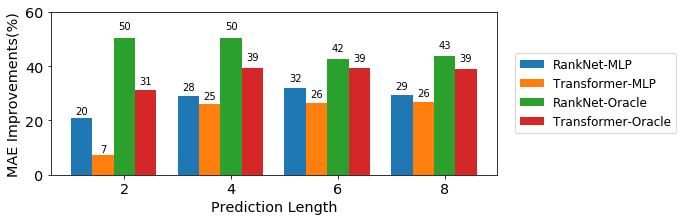

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

N = len(plens)

ind = np.arange(N) 
width = 0.2      
rects = []
for idx, m in enumerate(models):
    rects.append(plt.bar(ind +  width*idx, data[m]*100, width, label=m))

for rect in rects:
    autolabel(rect)
    
plt.xticks(ind + width*N/ 2, [str(x) for x in plens])

ax.set_ylim(0,60)
ax.set_xlabel('Prediction Length')
ax.set_ylabel('MAE Improvements(%)')
#axs.set_title('Stint Distance Histogram')
#axs.legend(prop={'size': 12})
#plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=3, ncol=4, mode="expand", borderaxespad=0,prop={'size': 12})
#plt.legend(bbox_to_anchor=(0, 1), loc=3, ncol=1, mode="expand", borderaxespad=0, prop={'size': 12})
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0,prop={'size': 12})

plt.savefig(f'{dataroot}/fig-bar-shortterm-indy2019-plen-transformer.pdf', bbox_inches="tight")

In [51]:
data

{'RankNet-MLP': array([0.20721271, 0.28985782, 0.32063882, 0.29375514]),
 'Transformer-MLP\t': array([], dtype=float64),
 'RankNet-Oracle': array([0.50336186, 0.50236967, 0.4259828 , 0.43631882]),
 'Transformer-Oracle': array([0.31265281, 0.39393365, 0.39112408, 0.39030403])}

In [11]:
drawid

'fig5'